In [118]:
import re
import string

import nltk
import numpy
import numpy as np
import pandas as pd
import seaborn as sns
from keras_preprocessing.sequence import pad_sequences
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, \
    confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras_preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm
from itertools import product


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\57459N\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [116]:
def plot_confusion_matrix_and_print_metrics(y_pred, y_true):
    conf_matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt="d")
    ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['No Spam', 'Spam'])
    ax.set_ylabel("Actual", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['No Spam', 'Spam'])
    plt.show()
    print(conf_matrix)
    print(classification_report(y_true, y_pred))


def print_model(_model, _preds, trues):
    print(model)
    print(f'\taccuracy: {accuracy_score(_preds, trues)}')
    print(f'\tprecision: {precision_score(trues, _preds)}')
    print(f'\trecall: {recall_score(trues, preds)}')
    print(f'\tf1: {f1_score(_preds, trues)}')
    print(f'\troc_auc: {roc_auc_score(_preds, trues)}')

def train_and_eval_model(max_features: int, max_depth: int, verbose=False) -> float:
    vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
    X = vectorizer.fit_transform(corpus).toarray()
    y = data['spam']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    rf_clf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf_clf.fit(X_train, y_train)

    ns_probs = [0 for _ in range(len(y_test))]

    preds = rf_clf.predict(X_test)
    probs = rf_clf.predict_proba(X_test)[:, 1]
    if verbose:
        fpr, tpr, _ = roc_curve(y_test, probs)
        plt.plot(fpr, tpr)
        fpr, tpr, _ = roc_curve(y_test, ns_probs)
        plt.plot(fpr, tpr)

        plt.figure()
        plot_confusion_matrix_and_print_metrics(preds, y_test)
        print_model(rf_clf, preds, y_test)

    return roc_auc_score(y_test, preds)

In [3]:
data = pd.read_csv('data/dataset_lab2.csv')
data.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
text = data['text']

# Only words and digits separated with space, then lower< then split, then remove common word 'subject'   
text = text.apply(lambda x:
                  re.sub('[^a-zA-Z0-9]+', ' ', x)
                  .lower()
                  .split()
                  [1:])
text

0       [naturally, irresistible, your, corporate, ide...
1       [the, stock, trading, gunslinger, fanny, is, m...
2       [unbelievable, new, homes, made, easy, im, wan...
3       [4, color, printing, special, request, additio...
4       [do, not, have, money, get, software, cds, fro...
                              ...                        
5723    [re, research, and, development, charges, to, ...
5724    [re, receipts, from, visit, jim, thanks, again...
5725    [re, enron, case, study, update, wow, all, on,...
5726    [re, interest, david, please, call, shirley, c...
5727    [news, aurora, 5, 2, update, aurora, version, ...
Name: text, Length: 5728, dtype: object

In [5]:
ps = PorterStemmer()
stops = set(stopwords.words('english'))
# remove stops
text = text.map(lambda l: list(filter(lambda x: x not in stops, l)))
print(text[0])
# stem
text = text.map(lambda l: list(map(lambda x: ps.stem(x), l)))
print(text[0])

['naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 'affordabil

In [6]:
corpus = text.map(lambda x: ' '.join(x))

corpus

0       natur irresist corpor ident lt realli hard rec...
1       stock trade gunsling fanni merril muzo colza a...
2       unbeliev new home made easi im want show homeo...
3       4 color print special request addit inform cli...
4       money get softwar cd softwar compat great grow...
                              ...                        
5723    research develop charg gpg forward shirley cre...
5724    receipt visit jim thank invit visit lsu shirle...
5725    enron case studi updat wow day super thank muc...
5726    interest david pleas call shirley crenshaw ass...
5727    news aurora 5 2 updat aurora version 5 2 faste...
Name: text, Length: 5728, dtype: object

In [121]:
feats = range(150, 250, 25)
depths = range(9, 15)

roc_scores = np.array([[train_and_eval_model(f, d) for f in feats] for d in depths])

[]

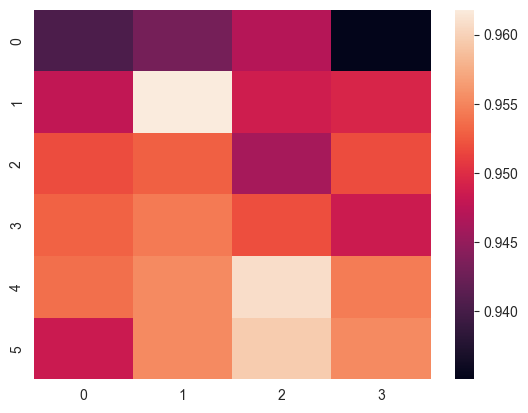

In [122]:
sns.heatmap(roc_scores)
plt.plot()

In [124]:
top = 5
flat = roc_scores.flatten()
ind = np.argpartition(flat, -top)[-top:]
ind = ind[np.argsort(flat[ind])[::-1]]
best_params = np.array(list(product(feats, depths)))[ind]
print('score\tfeats depth')
for i, j in zip(best_params, flat[ind]):
    print(f'{j:.5f}, {i}')

score	feats depth
0.96180, [150  14]
0.96076, [225   9]
0.95955, [225  13]
0.95525, [225  14]
0.95525, [200  14]


In [13]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

In [14]:
sequences_matrix = pad_sequences(sequences, maxlen=150)

In [15]:
sequences_matrix

array([[  0,   0,   0, ...,  48, 522,  60],
       [  0,   0,   0, ...,  33, 237, 727],
       [  0,   0,   0, ..., 235,  48, 360],
       ...,
       [245, 379,  68, ..., 421, 239, 421],
       [  0,   0,   0, ...,  60,   3,   8],
       [ 19,  42, 662, ...,  59,  19, 231]])